In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


### Process Model

\begin{equation}
    x(t)  =  \alpha x(t-1) (1- x(t-1))  + \delta_t, \quad \delta_t  \sim  N(0,q^2)
\end{equation}

In [37]:
def process(alpha,x0,a,T,q):
    t = np.arange(a,b+1,1)
    x = np.zeros(len(t))
    x[0] = x0
    for i in range(1,len(t)):
        x[i] = alpha*x[i-1] *(1-x[i-1]) + np.random.normal(0,q)
    return x,t
a = 0
T = 100
x0 = np.random.normal(0.1,0.01)
q = 0.01
r = 0.05
alpha = 0.9
x,t = process(alpha,x0,a,T,q)

<IPython.core.display.Javascript object>


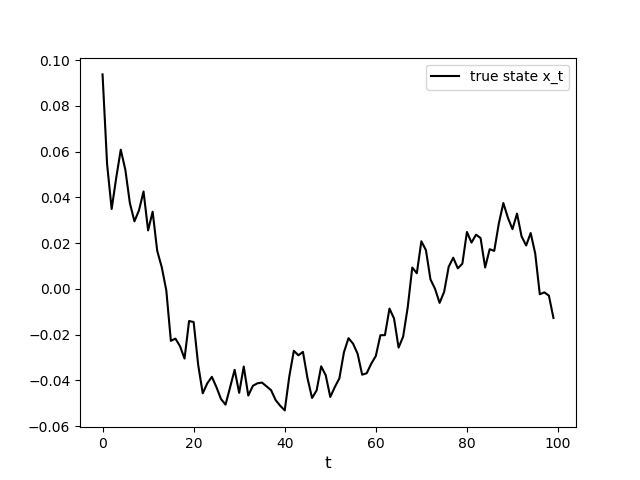

In [38]:
figure(1)
clf()
state,=plt.plot(x[1:],'k',markersize=4)
plt.legend([state], ['true state x_t'])
xlabel('t', fontsize=12)
show()

### Data Model

\begin{equation}
    y(t)  =  x(t) + \epsilon_t, \quad \epsilon_t  \sim  N(0,r^2)
\end{equation}

In [44]:
def data(x,r):
    y = x[1:] + np.random.normal(0,r)
    return y

<IPython.core.display.Javascript object>


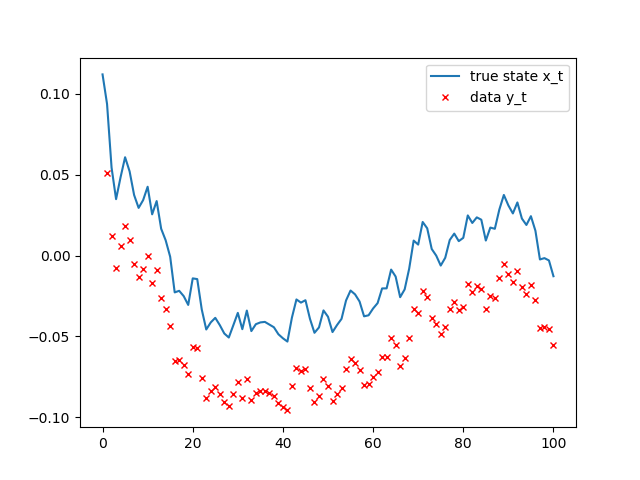

In [46]:
y = data(x,r)
figure(2)
state,=plt.plot(x,markersize=4)
data,=plt.plot(t[1:],y,'rx',markersize=4)
plt.legend([state,data], ['true state x_t','data y_t'])
show()

### Kalman Filter Algorithm

In [48]:
def kalman(alpha,q,r,y,T,mu,sig,h):
    gain = np.zeros(T)
    mu_new = np.zeros(T)
    sig_new = np.zeros(T)
    mu_old = alpha - 2 * (alpha* mu) 
    sig_old = q + alpha*sig*alpha
    for i in range(0,T):
        gain[i] = sig_old*h*(h*sig_old*h+r)**(-1) # gain matrix K_t
        mu_new[i] = mu_old + gain[i] * (y[i] - h*mu_old) #returns the new mu value
        sig_new[i] = (1-gain[i]*h)*sig_old #returns new sigma (variance)
        mu_old = alpha - 2*(alpha - mu_new[i])
        sig_old = q + alpha - 2*(alpha * sig_new[i])
    return mu_new,sig_new,gain

In [49]:
mu =  0.1
sig  =  0.01
h = 1
mu_new, sig_new, gain = kalman(alpha,q**2,r**2,y,T,mu,sig,h)

<IPython.core.display.Javascript object>


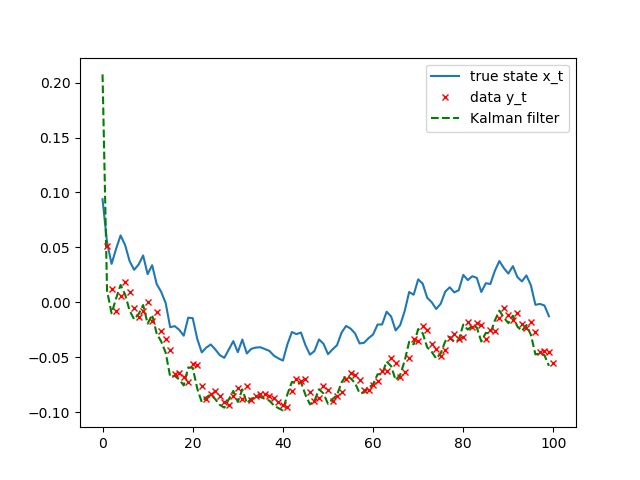

In [51]:
figure(3)
state,=plt.plot(x[1:],markersize=4)
kfilter,=plt.plot(mu_new,'--g',markersize=4)
data,=plt.plot(t[1:],y,'rx',markersize=4)
plt.legend([state,data,kfilter], ['true state x_t','data y_t','Kalman filter'])

<IPython.core.display.Javascript object>


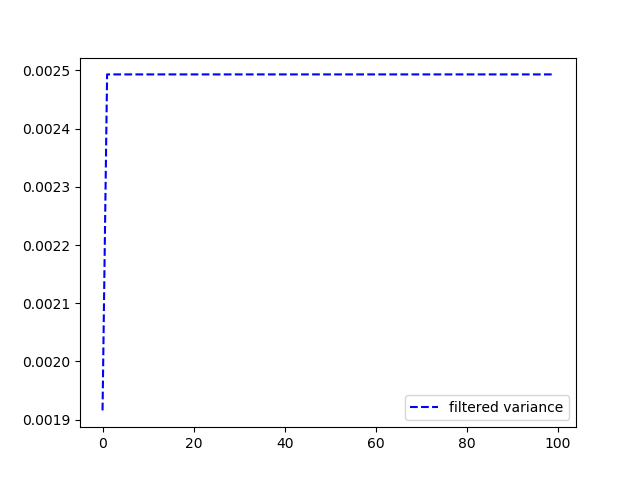

In [52]:
figure(4)
fvar,=plt.plot(sig_new,'--b',markersize=4)
plt.legend([fvar], ['filtered variance'])
show()